#### Blóðflokkur:

-Einstaklingur í blóðflokki O einungis þegið nýra frá einstaklingi í blóðflokki O  
-Einstaklingur í blóðflokki A einungis þegið nýra frá einstaklingi í blóðflokki O eða A  
-Einstaklingur í blóðflokki B einungis þegið nýra frá einstaklingi í blóðflokki O eða B  
-Einstaklingur í blóðflokki AB einungis þegið nýra frá einstaklingi í blóðflokki O, B eða A  

Ekki þarf að taka tillit til Rhesus +/- við líffæra ígræðslur

#### HLA mótefnavakar:

HLA Typing
HLA typing is also called “tissue typing”. HLA stands for human leukocyte antigen. Antigens are proteins on the cells in the body. Out of over 100 different antigens that have been identified, there are six that have been shown to be the most important in organ transplantation. Of these six antigens, we inherit three from each parent.

Except in cases of identical twins and some siblings, it is rare to get a six-antigen match between two people, especially if they are unrelated. Kidneys are very successfully transplanted between two people with no matching antigens.

A person can make antibodies against another person’s HLA antigens. Antibodies can result from blood transfusions, pregnancy, infections or even a viral illness. Having one of these events does not mean a person will make antibodies but they could. If a recipient has strong antibodies against a donor’s HLA, the risk of rejection is high and a donor would be declined for that recipient.

HLA-A,HLA-B and HLA-C; minor genes are HLA-E, HLA-F and HLA-G
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3598844/

https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0196707&type=printable

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [3]:
#Estimated Glomerular Filtration Rate
#kidney.org/sites/default/files/docs/11-10-1813_abe_patbro_gfr_b.pdf

eGFRm18 = np.random.normal(100,13,1000) #Male 18 to 24
eGFRm25 = np.random.normal(93,13,1000)  #Male 25 to 29
eGFRm30 = np.random.normal(86,13,1000)  #Male 30 to 34
eGFRm35 = np.random.normal(85,14,1000)  #Male 35 to 39
eGFRm40 = np.random.normal(84,13,1000)  #Male 40 to 44
eGFRm45 = np.random.normal(83,13,1000)  #Male 45 to 49
eGFRm50 = np.random.normal(79,12,1000)  #Male 50 to 54
eGFRm55 = np.random.normal(76,13,1000)  #Male 55 to 59
eGFRm60 = np.random.normal(75,15,1000)  #Male 60 to 64

eGFRf18 = np.random.normal(91,15,1000)  #Female 18 to 24
eGFRf25 = np.random.normal(85,13,1000)  #Female 25 to 29
eGFRf30 = np.random.normal(85,15,1000)  #Female 30 to 34
eGFRf35 = np.random.normal(79,13,1000)  #Female 35 to 39
eGFRf40 = np.random.normal(77,12,1000)  #Female 40 to 44
eGFRf45 = np.random.normal(74,10,1000)  #Female 45 to 49
eGFRf50 = np.random.normal(73,13,1000)  #Female 50 to 54
eGFRf55 = np.random.normal(70,12,1000)  #Female 55 to 59
eGFRf60 = np.random.normal(68,12,1000)  #Female 60 to 64

In [1]:
def rand_pop(size):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that creates a random pool of Icelandic people
    
    #Input Variables:
        #size:       Number of persons, int
    
    #Output:
        #pop:        Pool of Icelandic people with and critera used for evaluating kidney compatibility, array
#--------------------------------------------------------------------------------------------------------------------------
    
    bt_pop = np.random.choice(['O', 'A', 'B', 'AB'], size, p=[0.55, 0.32, 0.10, 0.03])   #Blood type
    aa_pop = np.random.choice([0, 1], size, p=[0.995, 0.005])                            #Born in Africa
    age_pop = np.random.randint(18, 60 ,size)                                            #Age
    gen_pop = np.random.choice([0, 1], size, p=[0.5, 0.5])                               #Sex
    
    #Initialize
    #Estimated Glomerular Filtration Rate:
    eGFR_pop = np.zeros(size)            #kidney.org/sites/default/files/docs/11-10-1813_abe_patbro_gfr_b.pdf
    
    #Body Mass Index:
    BMI_pop = np.zeros(size)             #landlaeknir.is/servlet/file/store93/item35880/4950_zbmifl_BMI_UTFEGID.pdf
    
    #Systolic Blood Pressure:
    SBP_pop = np.zeros(size)             #hjarta.is/wp-content/uploads/2019/03/Handbok-Hjartaverndar.pdf
    
    #History of Cigarette Use:
    cig_pop = np.zeros(size)             #https://www.landlaeknir.is/tolfraedi-og-rannsoknir/tolfraedi/heilsa-og-lidan/tobaksnotkun/
    
    #Place holders:
    hla_b_pop = np.zeros(size)           #Does not belong in this function, only here as a placeholder.
    hla_dr_pop = np.zeros(size)          #Does not belong in this function, only here as a placeholder.
    rel_pop = np.zeros(size)             #Could the probably be calculated. What is the likelihood of an Icelander running
                                         #someone as related as first from a randomly choice group of Icelanders.
                                         #Does not belong in this function, only here as a placeholder.
    
    for i in range(size):
        
        if age_pop[i] >= 18 and age_pop[i] <= 29:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 24:
                    eGFR_pop[i] = np.random.choice(eGFRm18)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm25)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.6925, 0.3075])
                
            elif gen_pop[i] == 1:

                if age_pop[i] <= 24:
                    eGFR_pop[i] = np.random.choice(eGFRf18)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf25)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.7440, 0.256])
                
        elif age_pop[i] >= 30 and age_pop[i] <= 39:
            
            if gen_pop[i] == 0:

                if age_pop[i] <= 34:
                    eGFR_pop[i] = np.random.choice(eGFRm30)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm35)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5837, 0.4163])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 34:
                    eGFR_pop[i] = np.random.choice(eGFRf30)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf35)                
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.6085, 0.3915])
                
        elif age_pop[i] >= 40 and age_pop[i] <= 49:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 44:
                    eGFR_pop[i] = np.random.choice(eGFRm40)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm45)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5457, 0.4543])
                
            elif gen_pop[i] == 1:
                
                if gen_pop[i] == 0:
                
                    if age_pop[i] <= 44:
                        eGFR_pop[i] = np.random.choice(eGFRf40)
                    else:
                        eGFR_pop[i] = np.random.choice(eGFRf45)
                
                    cig_pop[i] = np.random.choice([0, 1], 1, p=[0.5702, 0.4298])
                
        elif age_pop[i] >= 50 and age_pop[i] <= 59:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 54:
                    
                    eGFR_pop[i] = np.random.choice(eGFRm50)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRm55)
                    
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.384, 0.616])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 54:
                    
                    eGFR_pop[i] = np.random.choice(eGFRf50)
                else:
                    eGFR_pop[i] = np.random.choice(eGFRf55)
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.4553, 0.5447])
            
        elif age_pop[i] >= 60 and age_pop[i] <= 69:
            
            if gen_pop[i] == 0:
                
                if age_pop[i] <= 64:
                    
                    eGFR_pop[i] = np.random.choice(eGFRm60)

                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.3371, 0.6629])
                
            elif gen_pop[i] == 1:
                
                if age_pop[i] <= 64:
                    
                    eGFR_pop[i] = np.random.choice(eGFRf60)
                
                cig_pop[i] = np.random.choice([0, 1], 1, p=[0.3682, 0.6318])
                
        elif age_pop[i] >= 70 and age_pop[i] <= 79:
            eGFR_pop[i] = 75
            
        if gen_pop[i] == 0:
            
            if age_pop[i] >=18 and age_pop[i] <= 44:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.009, 0.376, 0.386, 0.229])
                
                SBP_pop[i] = 122
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
                    
            elif age_pop[i] >=45 and age_pop[i] <= 66:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.001, 0.191, 0.522, 0.286])
                
                SBP_pop[i] = 126
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                
                
            elif age_pop[i] >= 67:

                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.003, 0.27, 0.473, 0.255])
                
                SBP_pop[i] = 140
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                 
        
        elif gen_pop[i] == 1:
                
            if age_pop[i] >= 18 and age_pop[i] <= 44:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.011, 0.452, 0.269, 0.268])
                
                SBP_pop[i] = 108
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
                    
            elif age_pop[i] >= 45 and age_pop[i] <= 66:
                
                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.002, 0.343, 0.350, 0.305])
                
                SBP_pop[i] = 120
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)                
                
            elif age_pop[i] >= 67:

                temp = np.random.choice([0, 1, 2, 3], 1, p=[0.015, 0.318, 0.413, 0.253])
                
                SBP_pop[i] = 140
                
                if temp == 0:
                    BMI_pop[i] = np.random.randint(14, 18.49 ,1)
                elif temp == 1:
                    BMI_pop[i] = np.random.randint(18.5, 25 ,1)
                elif temp == 2:
                    BMI_pop[i] = np.random.randint(25.01, 30 ,1)
                elif temp == 3:
                    BMI_pop[i] = np.random.randint(30.01, 47 ,1)
    
    pop = [bt_pop, cig_pop, age_pop, eGFR_pop, BMI_pop, aa_pop, SBP_pop, rel_pop, hla_b_pop, hla_dr_pop, gen_pop]
    pop = np.array(pop,dtype=object)
                
    return pop

In [5]:
def LKDPI_fun(rec_pop, don_pop):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that evaluates kidney receiver and donor compatibility
    
    #Input Variables:
        #rec_pop:       Pool of kidney receivers, array
        #don_pop:       Pool of kidney donors, array
    
    #Output:
        #LKDPI:         Compatibility of each kidney receiver and donor, array
        
    #A Risk Index for Living Donor Kidney Transplantation
    #Living Kidney Donor Profile Index
    #https://onlinelibrary.wiley.com/doi/pdf/10.1111/ajt.13709
#--------------------------------------------------------------------------------------------------------------------------
    
    #Input:
    age = don_pop[2,:]                 #Age of donor
    cig = don_pop[1,:]                 #Smoker, 1 for True, 0 for False
    eGFR = don_pop[3,:]                #Estimated Glomerular Filtration Rate
    BMI = don_pop[4,:]                 #Body Mass Index
    aa = don_pop[5,:]                  #African-American, 1 for True, 0 for False
    SBP = don_pop[6,:]                 #Systolic Blood Pressure
    rel = don_pop[7,:]                 #Donor and Recipient Related, 1 for True, 0 for False
    hla_b = don_pop[8,:]               #HLA-B mismatches, 0 to 2
    hla_dr = don_pop[9,:]              #HLA-DR mismatches, 0 to 2
    
    res_g = rec_pop[10,:]              #Recipient Gender, 1 for male, 0 for female
    don_g = don_pop[10,:]              #Donor Gender, 1 for male, 0 for female
    res_w = 80                         #Recipient Weight
    don_w = 80                         #Donor Weight
    res_bt = rec_pop[0,:]              #Recipient Blood type, O, A, B or AB
    don_bt = don_pop[0,:]              #Donor Blood type, O, A, B or AB
    
    hla_b_pop = np.zeros(don_pop.shape[1])
    hla_dr_pop = np.zeros(don_pop.shape[1])

    #Initialize:
    age_f = 0                          #Age Factor
    aa_f = 0                           #African-American Factor
    cig_f = 0                          #Cigarette Use Factor
    mm_f = 0                           #Male Recipient, Male Donor Factor
    bt_f = 0                           #Blood Type Factor
    rel_f = 0                          #Related Factor
    WR = 0                             #Weight Ratio
    LKDPI = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1])) #Output
    
    #temp
    temp_hla_b = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    temp_hla_dr = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    temp_hla_rel = np.zeros(shape=(rec_pop.shape[1],don_pop.shape[1]))
    
    #Calculate compatibility:
    for j in range(rec_pop.shape[1]):
        
        for i in range(don_pop.shape[1]):

            if age[i] > 50:
                age_f = age[i] - 50
            else:
                age_f = 0
    
            if cig[i] == 1:
                cig_f = 14.33
            else:
                cig_f = 0
    
            if aa[i] == 1:
                aa_f = 22.34
            else:
                aa_f = 0
    
            if res_g[j] == 1 and don_g[i] == 1:
                mm_f = -21.68
            else:
                mm_f = 0

            if res_bt[j] == "A" and (don_bt[i] == "O" or don_bt[i] == "A"):
                bt_f = 0
            elif res_bt[j] == "B" and (don_bt[i] == "O" or don_bt[i] == "B"):
                bt_f = 0
            elif res_bt[j] == "AB" and (don_bt[i] == "O" or don_bt[i] == "A" or don_bt[i] == "B" or don_bt[i] == "AB"):
                bt_f = 0
            elif res_bt[j] == "O" and don_bt[i] == "O":
                bt_f = 0
            else:
                bt_f = 27.3
            
            rel_temp = np.random.choice([0, 1], 1, p=[0.10, 0.90])
            if rel[i] == 0:
                rel_f = -10.16
            else:
                rel_f = 0

            if don_w/res_w < 0.9:
                WR = don_w/res_w
            else:
                WR = 0.9
            
            hla_b_pop[i] = np.random.choice([0, 1, 2], 1, p=[0.05, 0.30, 0.65])
            hla_dr_pop[i] = np.random.choice([0, 1, 2], 1, p=[0.05, 0.30, 0.65])
            
            LKDPI[j,i] = -11.3+(1.85*age_f)-(0.381*eGFR[i])+(1.17*(BMI[i]+cig_f+aa_f))+(0.44*(SBP[i]+mm_f+bt_f+rel_temp))+(8.57*hla_b_pop[i])+(8.26*hla_dr_pop[i])-(50.87*WR)
          
            temp_hla_b[j,i] = hla_b_pop[i]
            temp_hla_dr[j,i] = hla_dr_pop[i]
            temp_hla_rel[j,i] = rel_temp
        
    return LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel

In [260]:
def kidneyMatch(rec_pop, don_pop, don_link, LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel):
#--------------------------------------------------------------------------------------------------------------------------
    #Function that finds kidney receivers that provide kidney donors that are matches to other kidney receiver
    
    #Input Variables:
        #rec_pop:    Pool of kidney recievers, array
        #don_pop:    Pool of kidney donors, array
        #don_link:   List of what donors are associated with what receiver, array
        #LKDPI:      Compatability of all donors vs. receivers, array
    
    #Output:
        #rec_pop:    Pool of kidney recievers, 2d array
        #don_pop:    Pool of kidney donors, 2d array
        #don_link:   List of what donors are associated with what receiver, array
        #LKDPI:      Compatability of all donors vs. receivers, 2d array
        #mMat:       Compatability of all receivers vs. receivers, 2d array
        #mArr_idx:   Receivers left, original sequence numbering, array
#--------------------------------------------------------------------------------------------------------------------------

    #Initialize:
    nRec = rec_pop.shape[1]               #Number of Kidney receivers
    nDon = don_pop.shape[1]               #Number of Kidney donors
    mMat = np.zeros(shape=(nRec,nRec))
    dMat = np.zeros(shape=(nRec,nRec))
    fitMat = np.zeros(shape=(nRec,nRec))
    noMatch = np.zeros(nRec)
    n = 0
    j = 0
    i = 0
    k = 0
    l = 0
    
    #Find all matches:
    for j in range(nRec):
        
        for i in range(nDon):
            
            if LKDPI[j,i] <= 50:
                
                mMat[don_link[i]-1,j] = 1

                if dMat[don_link[i]-1,j] == 0:
               
                    dMat[don_link[i]-1,j] = i+1
                
                    fitMat[[don_link[i]-1,j]] = LKDPI[j,i]
                
                elif dMat[don_link[i]-1,j] != 0 and fitMat[don_link[i]-1,j] > LKDPI[j,i]:
                    
                    dMat[don_link[i]-1,j] = i+1
                    
                    fitMat[[don_link[i]-1,j]] = LKDPI[j,i]       
        
        #No one can receive kidney from their own donors:           
        mMat[j,j] = 0 
        dMat[j,j] = 0
        fitMat[j,j] = 0
        
    mArr_idx = np.arange(1,nRec+1)

    mMat_row_idx = (np.sum(mMat,axis=1)==0)
    mMat_col_idx = (np.sum(mMat,axis=0)==0)

    #While their exists a kidney receiver in the pool that does not contribute with a donor or a kidney receiver that
    #is not a match to any donors:
    while (0 in mMat_row_idx) or (0 in mMat_col_idx):
    
        #Remove all receivers that don't contribute a donor
        for k in range(nRec-1,-1,-1):
        
            if mMat_row_idx[k] or mMat_col_idx[k]:
            
                print(f"Round {n}:",f"Kidney receiver #: {k+1} has no donors that are matches to other kidney receivers")
        
                LKDPI = np.delete(LKDPI,k,axis=0)
                rec_pop = np.delete(rec_pop,k,axis=1)
                mMat = np.delete(mMat,k,axis=0)
                mMat = np.delete(mMat,k,axis=1)
                dMat = np.delete(dMat,k,axis=0)
                dMat = np.delete(dMat,k,axis=1)
                fitMat = np.delete(fitMat,k,axis=0)
                fitMat = np.delete(fitMat,k,axis=1)
                mArr_idx = np.delete(mArr_idx,k)
                temp_hla_b = np.delete(temp_hla_b,k,axis=0)
                temp_hla_dr = np.delete(temp_hla_dr,k,axis=0)
                temp_hla_rel = np.delete(temp_hla_rel,k,axis=0)
    
        #Remove all donors that are associated with receivers that don't contribute a donor
        for l in range(don_link.shape[0]-1,-1,-1):
            
            if not don_link[l] in mArr_idx:
                
                don_link = np.delete(don_link,l,axis=0)
                #don_pop = np.delete(don_pop,l,axis=1)
                LKDPI = np.delete(LKDPI,l,axis=1)
                
        mMat_row_idx = np.sum(mMat,axis=1)
        mMat_col_idx = np.sum(mMat,axis=0)
        nRec = rec_pop.shape[1]               #Number of Kidney receivers still qualified
        n = n + 1

    return rec_pop, don_pop, don_link, LKDPI, mMat, mArr_idx, dMat, fitMat, temp_hla_b, temp_hla_dr, temp_hla_rel

In [261]:
def int_starting_population(nGene, nPop, nVar):
#--------------------------------------------------------------------------------------------------------------------------
    #Function for generation of initial population
    
    #Input Variables:
        #nPop:       Number of Genes in Pool, int
        #nGener:     Number of Chromosomes in a Gene, int
        #nVar:       Number of Variables in a Gene, int
    
    #Output:
        #Pool of Genes, array
#--------------------------------------------------------------------------------------------------------------------------
        
    #Initialize:
    iPop = np.zeros((nPop, nGene))
    chromos = range(nVar)

    for i in range(nPop):
        iPop[i,:] = random.sample(chromos,nGene) 
    return iPop

In [262]:
def reproduction(sPop, P_i, rPr):
#--------------------------------------------------------------------------------------------------------------------------        
    #Function that performs Reproduction
    
    #Input Variables:
        #sPop:      Sorted pool of genes, array
        #P_i:       A list containing the probability for each gene when it comes to reproduction
        #rpr:       Reproduction rate (0.0-1.0)
    
    #Output:
        #rPop:      Pool of genes selected for reproduction
#--------------------------------------------------------------------------------------------------------------------------

    rp_size = round(sPop.shape[0]*(1-rPr))             #Number of genes selected for reproduction
    
    pH = np.arange(0,sPop.shape[0])
    
    idx = np.random.choice(pH, rp_size, p=P_i)      #Genes selected for reproduction
    
    rPop = sPop[idx,:]
           
    return rPop

In [263]:
def fitnessOne(gPop, Mmat):
#--------------------------------------------------------------------------------------------------------------------------
    #Function for evaluating fitness of each gene
    
    #Input Variables:
        #gPop:          Pool of Genes, 2d array
        #mMat:          Receiver compability matrix, 2d array
    
    #Output:
        #sPop:          Pool of Genes, sorted based on fitness value, 2d array
        #P_i:           Probability of a gene being picked for reproduction, array
        #avgFit:        Average fitness of generation, array
        #leadFit:       Fitness of leading gene, int
        #leadGene:      Gene leading in fitness value. array
#--------------------------------------------------------------------------------------------------------------------------
    #Initialize
    #Local variables:
    nGenes = gPop.shape[0]
    nChromo = gPop.shape[1]
    i = 0
    j = 0
    k = 0
    tempA = 0
    tempB = 0
    Q = 0
    F_i = np.zeros(nGenes)
    
    #Global variables:
    avgFit = 0
    leadFit = 0
    P_i = np.zeros(nGenes)
    sPop = np.zeros(nGenes)
#--------------------------------------------------------------------------------------------------------------------------
    #Evaluate fitness of each gene:
    for i in range(nGenes):

        for j in range(nChromo-1):
            
            tempA = np.int_(gPop[i,j])
            tempB = np.int_(gPop[i,j+1])

            if mMat[tempA,tempB] == 1:           #Weak Component
                
                F_i[i] = F_i[i] + 1
                
                if mMat[tempB,0] == 1:           #Strong Component
                    
                    F_i[i] = F_i[i] + j
                    #F_i[i] = F_i[i] + 5
            
            else:
                
                F_i[i] = F_i[i] - 1
                
                if F_i[i] < 0:
                    
                    F_i[i] = 0
    
    #Sort the genepool by fitness:
    F_i = np.array(F_i)
    gPop = np.array(gPop)
    
    inds = F_i.argsort()
    sF_i = F_i[inds]
    sPop = gPop[inds]
    
    #Calculate the probability of each gene to reproduce:
    Q = np.sum(F_i)
    for k in range(nGenes):
        
        P_i[k] = sF_i[k]/Q
    
    #Find the leader and calculate the average fitness of the generation:                
    avgFit = np.average(F_i)
    leadFit = sF_i[nGenes-1]
    leadGene = sPop[nGenes-1,:]
    
    return sPop, P_i, avgFit, leadFit, leadGene

In [264]:
def fitnessTwo(gPop, mMat, maxChain, fitMat, bestFit, bestChain):
#--------------------------------------------------------------------------------------------------------------------------
    #Function for evaluating fitness of each gene
    
    #Input Variables:
        #gPop:          Pool of Genes, 2d array
        #mMat:          Receiver compability matrix, 2d array
    
    #Output:
        #sPop:          Pool of Genes, sorted based on fitness value, 2d array
        #P_i:           Probability of a gene being picked for reproduction, array
        #avgFit:        Average fitness of generation, array
        #leadFit:       Fitness of leading gene, int
        #leadGene:      Gene leading in fitness value. array
#--------------------------------------------------------------------------------------------------------------------------
    #Initialize
    #Local variables:
    
    nGenes = gPop.shape[0]
    nChro = gPop.shape[1]
    F_i = np.zeros(nGenes)
    LKDRI_FIT = 0
    
    #Global variables:
    avgFit = 0
    leadFit = 0
    P_i = np.zeros(nGenes)
    sPop = np.zeros(nGenes)
    gPop = np.array(gPop)
    mMat = np.array(mMat)
    fitMat = np.array(fitMat)
    tempFit = bestFit
    tempChain = bestChain
#--------------------------------------------------------------------------------------------------------------------------
    #Evaluate fitness of each gene:
    
    fmax = maxChain*((nChro-maxChain)+1)

    for i in range(nGenes):
        
        f_i = 0
        
        for k in range(nChro-(maxChain-1)):
            
            chroAlpha = np.int_(gPop[i,k])
            LKDRI_Gene = np.zeros(nChro)
            
            j = 0
            
            
            while j < maxChain-1:
        
                chro1 = np.int_(gPop[i,k+j])
                chro2 = np.int_(gPop[i,k+j+1])
            
                if mMat[chro1, chro2] == 1:
                
                    #F_i[i] += 1
                    f_i += 1
                    
                    LKDRI_Gene[k+j] = fitMat[chro1, chro2]
                    
                             
                if (j == maxChain-2) and (mMat[chro2,chroAlpha] == 1):
                    
                    #F_i[i] += 1
                    f_i += 1
                        
                    LKDRI_Gene[k+j+1] = fitMat[chro2,chroAlpha]    
                    
                j += 1
                
            LKDRI_FIT = np.sum(LKDRI_Gene)
            LKDRI_ind = [LKDRI_Gene < 0]
            #LKDRI_FIT = np.average(LKDRI_Gene[LKDRI_ind])
            
            #sh = np.array(LKDRI_ind)
            #print(sh)
                
            if tempFit > LKDRI_FIT:# and sh.shape[0] > 1:
                tempFit = LKDRI_FIT
                theGene = gPop[i,:]
                bestChain = theGene[LKDRI_ind]
                print(f"Best Fitness: {tempFit}",f"Best Gene: {gPop[i,:]}", f"Chain: {theGene[LKDRI_ind]}")
                
        F_i[i] += (1+2**-7)*fmax-f_i
            
    #Sort the genepool by fitness:
    F_i = np.array(F_i)
    gPop = np.array(gPop)
    
    inds = F_i.argsort()
    sF_i = F_i[inds]
    sPop = gPop[inds]
    
    #Calculate the probability of each gene to reproduce:
    Q = np.sum(F_i)
    for l in range(nGenes):
        
        P_i[l] = sF_i[l]/Q
    
    #Find the leader and calculate the average fitness of the generation:                
    avgFit = np.average(F_i)
    leadFit = sF_i[nGenes-1]
    leadGene = sPop[nGenes-1,:]
    
    return sPop, P_i, avgFit, leadFit, leadGene, tempFit, bestChain

In [265]:
def fitnessThree(gPop, mMat, maxChain, fitMat, bestFit, bestChain):
#--------------------------------------------------------------------------------------------------------------------------
    #Function for evaluating fitness of each gene
    
    #Input Variables:
        #gPop:          Pool of Genes, 2d array
        #mMat:          Receiver compability matrix, 2d array
    
    #Output:
        #sPop:          Pool of Genes, sorted based on fitness value, 2d array
        #P_i:           Probability of a gene being picked for reproduction, array
        #avgFit:        Average fitness of generation, array
        #leadFit:       Fitness of leading gene, int
        #leadGene:      Gene leading in fitness value. array
#--------------------------------------------------------------------------------------------------------------------------
    #Initialize
    #Local variables:
    
    nGenes = gPop.shape[0]
    nChro = gPop.shape[1]
    F_i = np.zeros(nGenes)
    LKDRI_FIT = 0
    
    #Global variables:
    avgFit = 0
    leadFit = 0
    P_i = np.zeros(nGenes)
    sPop = np.zeros(nGenes)
    gPop = np.array(gPop)
    mMat = np.array(mMat)
    fitMat = np.array(fitMat)
    tempFit = bestFit
    tempChain = bestChain
#--------------------------------------------------------------------------------------------------------------------------
    #Evaluate fitness of each gene:
    
    fmax = 2*(maxChain*((nChro-maxChain)+1))

    for i in range(nGenes):
        
        f_i = 0
        
        for k in range(nChro-maxChain):
            
            chroAlpha = np.int_(gPop[i,k])
            LKDRI_Gene = np.zeros(nChro)
            
            j = 0
            
            while j < maxChain-1:
        
                chro1 = np.int_(gPop[i,k+j])
                chro2 = np.int_(gPop[i,k+j+1])
            
                if mMat[chro1, chro2] == 1:  #One point for if for a forward connection
                
                    f_i += 1
                    
                    LKDRI_Gene[k+j] = fitMat[chro1, chro2]
                    
                             
                if (j == maxChain-2) and (mMat[chro2,chroAlpha] == 1):   #One point for if for a forward connection
                    
                    f_i += 1
                        
                    LKDRI_Gene[k+j+1] = fitMat[chro2,chroAlpha]
                 
                if (f_i == maxChain) and (mMat[chro2,chroAlpha] == 1):    #Bonus points for complete chain
                    
                    f_i += maxChain

                j += 1
                
            temp = np.asarray(LKDRI_Gene)    
            #LKDRI_FIT = np.sum(LKDRI_Gene)
            LKDRI_ind = [temp != 0]
            LKDRI_FIT = np.average(LKDRI_Gene[LKDRI_ind])
            
            sh = temp[LKDRI_ind]
            laGene = gPop[i,:]
            
            #if sh.shape[0] > 1:
                #print(f"Fitness: {LKDRI_FIT}",f"Gene: {gPop[i,:]}", f"Chain: {laGene[LKDRI_ind]}")
                
            if tempFit > LKDRI_FIT and sh.shape[0] == maxChain:
                tempFit = LKDRI_FIT
                theGene = gPop[i,:]
                bestChain = theGene[LKDRI_ind]
                print(f"Best Fitness: {tempFit}",f"Best Gene: {gPop[i,:]}", f"Chain: {theGene[LKDRI_ind]}")
                
        F_i[i] += (1+2**-7)*fmax-f_i
            
    #Sort the genepool by fitness:
    F_i = np.array(F_i)
    gPop = np.array(gPop)
    
    inds = F_i.argsort()
    sF_i = F_i[inds]
    sPop = gPop[inds]
    
    #Calculate the probability of each gene to reproduce:
    Q = np.sum(F_i)
    for l in range(nGenes):
        
        P_i[l] = sF_i[l]/Q
    
    #Find the leader and calculate the average fitness of the generation:                
    avgFit = np.average(F_i)
    leadFit = sF_i[nGenes-1]
    leadGene = sPop[nGenes-1,:]
    
    return sPop, P_i, avgFit, leadFit, leadGene, tempFit, bestChain

In [266]:
def permutations(rPop, kids, pr):
#--------------------------------------------------------------------------------------------------------------------------    
    #Function that performs permutations
    
    #Input Variables:
        #r_pop: Pool of Genes, 2D array
        #kids:    Number of Genes in Pool
        #pr:    Print, 0 or 1
    
    #Output:
        #Pool with a New Generation of Genes
#--------------------------------------------------------------------------------------------------------------------------    

    L = rPop.shape[1]
    chrome = np.zeros(L)
    
    pPop = np.zeros(shape=(kids,L))
    
    #Permutations, type 1, 2 or 3, randomly selected:
    for i in range(0,kids):
        
        perm_type = random.randint(1,4)
        
        #Select Chromosomes for Permutation:
        perm_chrA = 0
        perm_chrB = 0
        
        while perm_chrA == perm_chrB:
    
            perm_chrA = random.randint(0,L-1)
            perm_chrB = random.randint(0,L-1)
        
            if perm_chrA > perm_chrB:
                temp = perm_chrA
                perm_chrA = perm_chrB
                perm_chrB = temp
            else:
                perm_chrA = perm_chrA
                perm_chrB = perm_chrB
            
            if pr == 1:
                print(f"Chromosome A: {perm_chrA}")
                print(f"Chromosome B: {perm_chrB}")
    
        chrome = rPop[i,:]
        
        if pr == 1:
            print(f"Chromosomes: {chrome}")
    
        if perm_type == 1:
            
            chrome[perm_chrA:perm_chrB] = chrome[perm_chrA:perm_chrB][::-1]
            chrome = list(chrome)
            
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
        
        elif perm_type == 2:
            
            temp_chrome1 = chrome[perm_chrA]
            temp_chrome2 = chrome[perm_chrB]
            chrome[perm_chrA] = temp_chrome2
            chrome[perm_chrB] = temp_chrome1
            chrome = list(chrome)
            
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
            
        elif perm_type == 3:
            
            temp_chrome1 = chrome[perm_chrA]
            
            if temp_chrome1 < L:
                temp_chrome2 = chrome[perm_chrA+1]
                chrome[perm_chrA] = temp_chrome2
                chrome[perm_chrA+1] = temp_chrome1 
            else:
                temp_chrome2 = chrome[perm_chrA-1]
                chrome[perm_chrA] = temp_chrome2
                chrome[perm_chrA-1] = temp_chrome1
            
            chrome = list(chrome)
             
            if pr == 1:
                print(f"Permutation type: {perm_type}")
                print(f"Chromosomes: {chrome}")
            
        elif perm_type == 4:
            
            if perm_chrB-perm_chrA == 1:
                
                if pr == 1:
                    print("No Relocation")
                    
                chrome = list(chrome)
            else:
                temp_chrome1 = chrome[perm_chrA]
                temp_chrome2 = chrome[perm_chrB]
                temp_chrome_arr2 = chrome[perm_chrA+1:perm_chrB]
                temp_chrome_arr3 = chrome[perm_chrB:]
                
                if perm_chrA == 0:
                    chrome = [*temp_chrome_arr2, temp_chrome1, *temp_chrome_arr3]
                else:
                    temp_chrome_arr1 = chrome[0:perm_chrA]
                    chrome = [*temp_chrome_arr1, *temp_chrome_arr2, temp_chrome1, *temp_chrome_arr3]
             
                if pr == 1:
                    print("Relocation")
                    print(f"Chromosomes: {chrome}")
        
        pPop[i] = chrome
    
    nPop = np.append(rPop,pPop,axis=0)
        
    return nPop

In [267]:
def kidney_chain_plot(mMat, mArr_idx, best_chain):
#--------------------------------------------------------------------------------------------------------------------------    
    #Function that:
        #-plots receivers that have donors that match with other receivers, if best_chain = 0
        #-plots the best kidney chain
    
    #Input Variables:
        #mMat:           Pool of Genes, 2D array
        #mArr_idx:       Number of Genes in Pool
        #best_chain:     Print, 0 or 1
    
    #Output:
        #Plot
#--------------------------------------------------------------------------------------------------------------------------
    
    n = mMat.shape[0]
    x = np.zeros(n)
    y = np.zeros(n)
    recs = np.empty(n,dtype='U3')
    deg_int = 0
    mArr_idx = np.array(mArr_idx,dtype='U3')
    
    for i in range(n):
        
        x[i] = n/2+n/2*math.cos(math.radians(deg_int))
        y[i] = n/2+n/2*math.sin(math.radians(deg_int))
        
        deg_int = deg_int + 360/n
        recs[i] = 'R'+mArr_idx[i]
    
    if np.sum(best_chain) == 0:
        plt.figure(num=1, figsize=(8,6))
        ax = plt.axes()
    else:
        plt.figure(num=2, figsize=(8,6))
        ax = plt.axes()
        
    colors = plt.cm.tab20(np.linspace(0,1,20))
    
    for k in range(n):    
        for j in range(n):
            if mMat[k,j] == 1:

                tx = [x[k],x[j]]
                ty = [y[k],y[j]]
                
                if np.sum(best_chain) == 0:
                    ax.arrow(x[k],y[k],(x[j]-x[k]),(y[j]-y[k]),head_width=0.2,length_includes_head=0.2,fc=colors[k], ec=colors[k])
                    
                
        ax.annotate(recs[k], (x[k],y[k]))
        plt.scatter(x[k],y[k],c=colors[k])
        
    if np.sum(best_chain) != 0:
        c0 = np.int_(best_chain[0])
        
        for i in range(best_chain.shape[0]-1):
                        
            c1 = np.int_(best_chain[i])
            c2 = np.int_(best_chain[i+1])
                
            ax.arrow(x[c1],y[c1],(x[c2]-x[c1]),(y[c2]-y[c1]),head_width=0.2,length_includes_head=0.2,fc='r', ec='r')
               
        ax.arrow(x[c2],y[c2],(x[c0]-x[c2]),(y[c0]-y[c2]),head_width=0.2,length_includes_head=0.2,fc='r', ec='r')
                
    plt.show
            
    return

In [268]:
def preprocessing(rec_size, don_size):
#-------------------------------------------------------------------------------------------------------------------------    
    #Function that preprocesses the kidney
        #- Generates random pools of kidney receivers and kidney donors.                        Function: rand_pop()
        #- Associates randomly which kidney donor is brought into the pool by which kidney receiver.
        #- Calculates compatibility between each kidney receiver and kidney donor.              Function: LKDPI_fun()
        #- Creates 1D and 2D index arrays for further processing and removes incompatibles.     Function: kidneyMatch()
    
    #Input Variables 
        #rec_size:    Number of kidney recievers, int
        #don_size:    Number of kidney donors, int
    
    #Output:
        #rec_pop:     Pool with a kidney receivers, 2D array
        #don_pop:     Pool with a kidney donors, 2D array
        #don_link:    Kidney receivers / Kidney donors association, array
        #LKDPI:       Compatibility rank between each kidney receiver and kidney donor, 2D array
        #mMat:        Receiver give/receive relationship, 2D array
        #fitMat:      Receiver give/receive relationship - Fitness value, 2D array
        #mArr_idx:    Original rank of kidney receivers, array
#-------------------------------------------------------------------------------------------------------------------------

    rec_pop = rand_pop(rec_size)                    #Generate a random pool of kidney receivers.
    don_pop = rand_pop(don_size)                    #Generate a random pool of kidney donors.
    best_chain = np.zeros(2)                        #Placeholder

    #Create a random association between kidney receivers and kidney donors:
    don_link = np.random.choice(np.arange(1,rec_size+1,1), don_size, p=np.ones(rec_size)*(1/rec_size))

    [LKDPI,temp_hla_b,temp_hla_dr,temp_hla_rel] = LKDPI_fun(rec_pop, don_pop)            #Find compatibility between each reciever and donor.
    
    #Find recievers that could participate in the kidney chain
    [rec_pop, don_pop, don_link, LKDPI, mMat, mArr_idx, dMat, fitMat, temp_hla_b, temp_hla_dr, temp_hla_rel] = kidneyMatch(rec_pop, don_pop, don_link, LKDPI, temp_hla_b, temp_hla_dr, temp_hla_rel)
    
    nEdges = np.int_(np.sum(mMat))                 #Number of edges - Not used.
    
    if mMat.shape[0] == 0:                         #TRUE: No kidney receiver / kidney donor compatibility
        print("No compability")
    
    #Plot
    if rec_pop.shape[1] <= 10 and mMat.shape[0] > 0:
        
        kidney_chain_plot(mMat, mArr_idx, best_chain)
    
    return rec_pop, don_pop, don_link, LKDPI, mMat, fitMat, mArr_idx, dMat, temp_hla_b, temp_hla_dr, temp_hla_rel

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


/home/kjartan/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


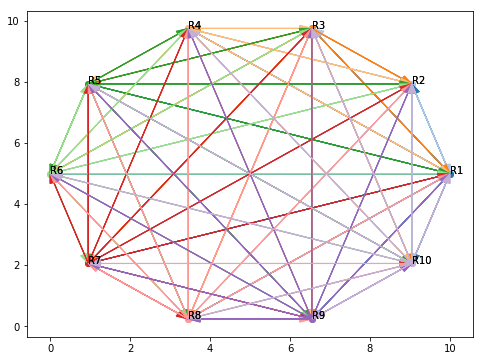

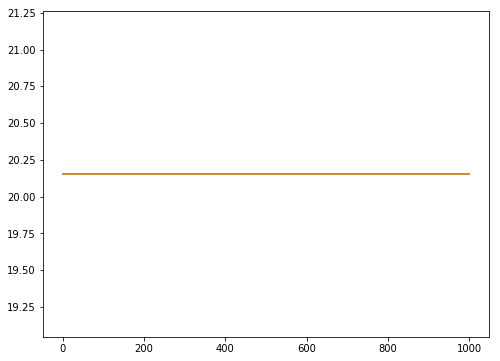

Pair: 1
Kidney Donor: Bloodtype: O, History of Smoking: 1.0, Age: 35,
Kidney Donor: eGFR: 90.59853999112386, BMI: 35.0, African Heritage: 0,
Kidney Donor: SBP: 122.0, Unrelated: 1.0, HLA-B Mismatches: 1.0,
Kidney Donor: HLA-DR Mismatches: 2.0, Gender: 0
Kidney Recipient: Bloodtype: O, History of Smoking: 1.0, Age: 56,
Kidney Recipient: eGFR: 91.37473754265055, BMI: 28.0, African Heritage: 0,
Kidney Recipient: SBP: 126.0, Gender: 0
 
Pair: 2
Kidney Donor: Bloodtype: O, History of Smoking: 1.0, Age: 35,
Kidney Donor: eGFR: 90.59853999112386, BMI: 35.0, African Heritage: 0,
Kidney Donor: SBP: 122.0, Unrelated: 1.0, HLA-B Mismatches: 1.0,
Kidney Donor: HLA-DR Mismatches: 2.0, Gender: 0
Kidney Recipient: Bloodtype: O, History of Smoking: 1.0, Age: 56,
Kidney Recipient: eGFR: 91.37473754265055, BMI: 28.0, African Heritage: 0,
Kidney Recipient: SBP: 126.0, Gender: 0
 
Pair: 3
Kidney Donor: Bloodtype: O, History of Smoking: 1.0, Age: 35,
Kidney Donor: eGFR: 90.59853999112386, BMI: 35.0, Africa

In [272]:
#Initialize:

rec_size = 10
don_size = 50
maxChain = 10
bestFit = 9

[rec_pop, don_pop, don_link, LKDPI, mMat, fitMat, mArr_idx, dMat, temp_hla_b, temp_hla_dr, temp_hla_rel] = preprocessing(rec_size, don_size)

maxOp = rec_pop.shape[1]

print(mMat)

rPr = 0.1
gen = 1000
avg = np.zeros(gen)
lead = np.zeros(gen)
champion = np.zeros(rec_pop.shape[1])
best_chain = np.zeros(rec_pop.shape[1])

#maxChain = rec_pop.shape[1]

iPop = int_starting_population(maxOp,50,rec_pop.shape[1])    #Generate Initial GenePool.

#-------------------------------------------------------------------------------------------------------------------------    
#Optimize:

for i in range(gen):
    
#Fitness:

        #[sPop, P_i, avgFit, leader, leadGene] = fitnessOne(iPop, mMat)
        [sPop, P_i, avgFit, leader, leadGene, bestFit, best_chain] = fitnessThree(iPop, mMat, maxChain, fitMat, bestFit, best_chain)
        
        if i > 0:
            
            champ = np.amax(lead)
            
            if champ < leader:
            
                print("New Champion")
            
                champion = leadGene
                
                print(champion)
                
        avg[i] = avgFit
        lead[i] = leader

#Reproduction:

        rPop = reproduction(sPop, P_i, rPr)

#Permutation:

        kids = sPop.shape[0]-rPop.shape[0]
    
        nPop = permutations(rPop, kids, 0)
        
        iPop = nPop

kidney_chain_plot(mMat, mArr_idx, best_chain)

x = range(1,i+2)

plt.figure(num=3, figsize=[8,6])
plt.plot(x,avg)
plt.plot(x,lead)
plt.show()

test1_pop = np.zeros(shape=(11,4),dtype=object)
test2_pop = np.zeros(shape=(11,4),dtype=object)

for j in range(best_chain.shape[0]-1):
    bc0 = np.int_(best_chain[0])
    bc1 = np.int_(best_chain[j])
    bc2 = np.int_(best_chain[j+1])
    p = np.int_(dMat[bc1,bc2]-1)
    
    print(f"Pair: {j+1}")
    print(f"Kidney Donor: Bloodtype: {don_pop[0,p]},", f"History of Smoking: {don_pop[1,p]},", f"Age: {don_pop[2,p]},")
    print(f"Kidney Donor: eGFR: {don_pop[3,p]},", f"BMI: {don_pop[4,p]},", f"African Heritage: {don_pop[5,p]},")
    print(f"Kidney Donor: SBP: {don_pop[6,p]},", f"Unrelated: {temp_hla_rel[bc2,p]},", f"HLA-B Mismatches: {temp_hla_b[bc2,p]},")
    print(f"Kidney Donor: HLA-DR Mismatches: {temp_hla_dr[bc2,p]},", f"Gender: {don_pop[10,p]}")
    print(f"Kidney Recipient: Bloodtype: {rec_pop[0,bc2]},", f"History of Smoking: {rec_pop[1,bc2]},", f"Age: {rec_pop[2,bc2]},")
    print(f"Kidney Recipient: eGFR: {rec_pop[3,bc2]},", f"BMI: {rec_pop[4,bc2]},", f"African Heritage: {rec_pop[5,bc2]},")
    print(f"Kidney Recipient: SBP: {rec_pop[6,bc2]},", f"Gender: {rec_pop[10,bc2]}")
    print(" ")

bc2 = np.int_(best_chain[j+1])
p = np.int_(dMat[bc2,bc0]-1)

print(f"Pair: {j+2}")
print(f"Kidney Donor: Bloodtype: {don_pop[0,p]},", f"History of Smoking: {don_pop[1,p]},", f"Age: {don_pop[2,p]},")
print(f"Kidney Donor: eGFR: {don_pop[3,p]},", f"BMI: {don_pop[4,p]},", f"African Heritage: {don_pop[5,p]},")
print(f"Kidney Donor: SBP: {don_pop[6,p]},", f"Unrelated: {temp_hla_rel[bc0,p]},", f"HLA-B Mismatches: {temp_hla_b[bc0,p]},")
print(f"Kidney Donor: HLA-DR Mismatches: {temp_hla_dr[bc0,p]},", f"Gender: {don_pop[10,p]}")
print(f"Kidney Recipient: Bloodtype: {rec_pop[0,bc0]},", f"History of Smoking: {rec_pop[1,bc0]},", f"Age: {rec_pop[2,bc0]},")
print(f"Kidney Recipient: eGFR: {rec_pop[3,bc0]},", f"BMI: {rec_pop[4,bc0]},", f"African Heritage: {rec_pop[5,bc0]},")
print(f"Kidney Recipient: SBP: {rec_pop[6,bc0]},", f"Gender: {rec_pop[10,bc0]}")